In [2]:
#Imports
from pandas import read_table
from numpy import array, unique
from keras import utils, Sequential, layers, losses, optimizers, callbacks
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
#Parameter declarations
batch_size       = 16
epochs           = 500
validation_split = 0.5
rate             = 0.4

# Problem 1

In [2161]:
#Read in iris data.
data = array(read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt", delim_whitespace = True, header = None))

In [2162]:
#Construct input vector
X          = data[:, 0:4]
input_size = X.shape[1]

In [2163]:
labels = data[:,4]

In [2164]:
#Populate output vector
Y           = utils.to_categorical(labels, len(unique(labels)))
output_size = Y.shape[1]

In [2165]:
#Construct models.
model = Sequential()
model.add(layers.Dense(output_size, activation = 'sigmoid', input_shape=[input_size]))
model.compile(loss = losses.mse, optimizer = optimizers.SGD(lr = rate), metrics = ['accuracy'])

In [2166]:
#Get history to plot.
history = model.fit(X, Y, batch_size = batch_size, epochs = epochs, verbose = 0, validation_split = validation_split)

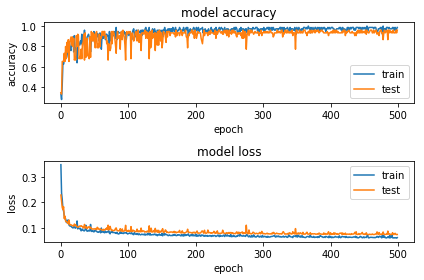

In [2167]:
#Plot accuracy and loss of testing and training data versus number of epochs.
plt.figure(1)
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.tight_layout()
plt.show()

In [12]:
#Display Test loss and accuracy.
score = model.evaluate(X, Y, batch_size = batch_size, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0366222667836
Test accuracy: 0.966549295775


# Problem 2

In [4]:
#Read in cancer data set.
data = array(read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.txt", delim_whitespace = True, header = None))

In [5]:
#Populate input vector.
X          = data[:, 0:30]
input_size = X.shape[1]

In [6]:
labels = data[:,30]

In [7]:
#Populate output vector.
Y           = utils.to_categorical(labels, len(unique(labels)))
output_size = Y.shape[1]

In [8]:
#Construct model.
model = Sequential()
model.add(layers.Dense(output_size, activation = 'sigmoid', input_shape=[input_size]))
model.compile(loss = losses.mse, optimizer = optimizers.SGD(lr = rate), metrics = ['accuracy'])

In [9]:
#Generate history to plot.
history = model.fit(X, Y, batch_size = batch_size, epochs = epochs, verbose = 0, validation_split = validation_split)

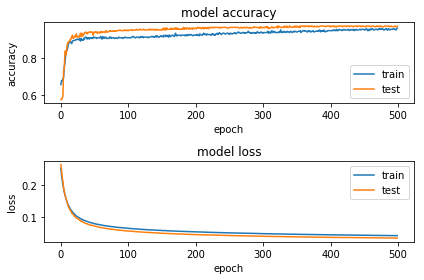

In [10]:
#Plot history
plt.figure(1)
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.tight_layout()
plt.show()

In [13]:
#Print test loss and accuracy.
score = model.evaluate(X, Y, batch_size = batch_size, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0366222667836
Test accuracy: 0.966549295775
